In [1]:
from prolint2 import Universe

In [2]:
from prolint2.sampledata import GIRKDataSample
GIRK = GIRKDataSample()
u = Universe(GIRK.coordinates, GIRK.trajectory)

In [3]:
contacts = u.compute_contacts(cutoff=7)

  0%|          | 0/1251 [00:00<?, ?it/s]

In [4]:
u.query.residues.resids

array([   1,    2,    3, ..., 1282, 1283, 1284])

In [5]:
from prolint2.metrics.metrics import Metric, MeanMetric, SumMetric, MaxMetric
import numpy as np

mean_instance = MeanMetric()
metric_instance = Metric(contacts, mean_instance)
mean_contacts = metric_instance.compute()

#### Point distributions

Fontconfig warning: ignoring UTF-8: not a valid region tag


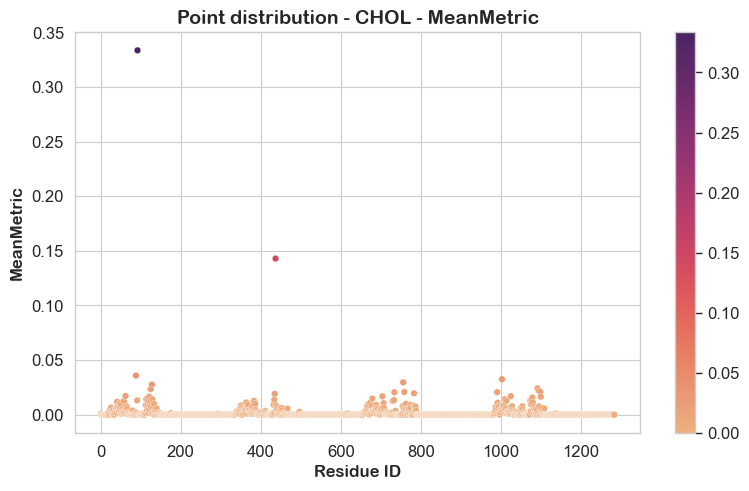

In [6]:
from prolint2.plotting import PointDistribution
PD = PointDistribution(u, mean_contacts, fig_size=(8, 5))
PD.create_plot(lipid_type='CHOL', metric_name='MeanMetric', linewidth=0.24, palette='flare')

In [7]:
PD.generate_script(PointDistribution, "point_distribution_plot.py")

#### Radar Plot

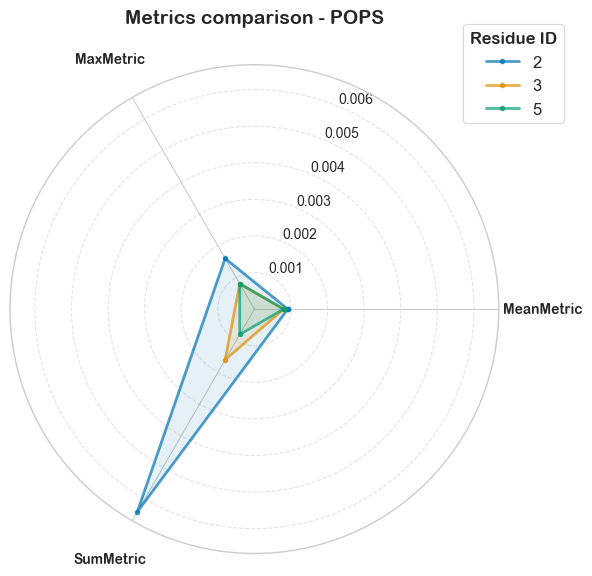

In [8]:
from prolint2.plotting import Radar
metric_instances_list = [MeanMetric(), SumMetric(), MaxMetric()]
metric_instance = Metric(contacts, metric_instances_list) # clear is True by default so we clear any existing metrics
contacts_out = metric_instance.compute() # populate the metric columns

RAD = Radar(contacts_out, fig_size=(6, 6))
RAD.create_plot(resIDs=[2, 3, 5], lipid_type='POPS', metric_names=['MeanMetric', 'SumMetric', 'MaxMetric'], marker='o', markersize=3, linewidth=2, alpha=0.7)

In [9]:
RAD.generate_script(Radar, "metric_comparison_radar_plot.py")

#### Density map

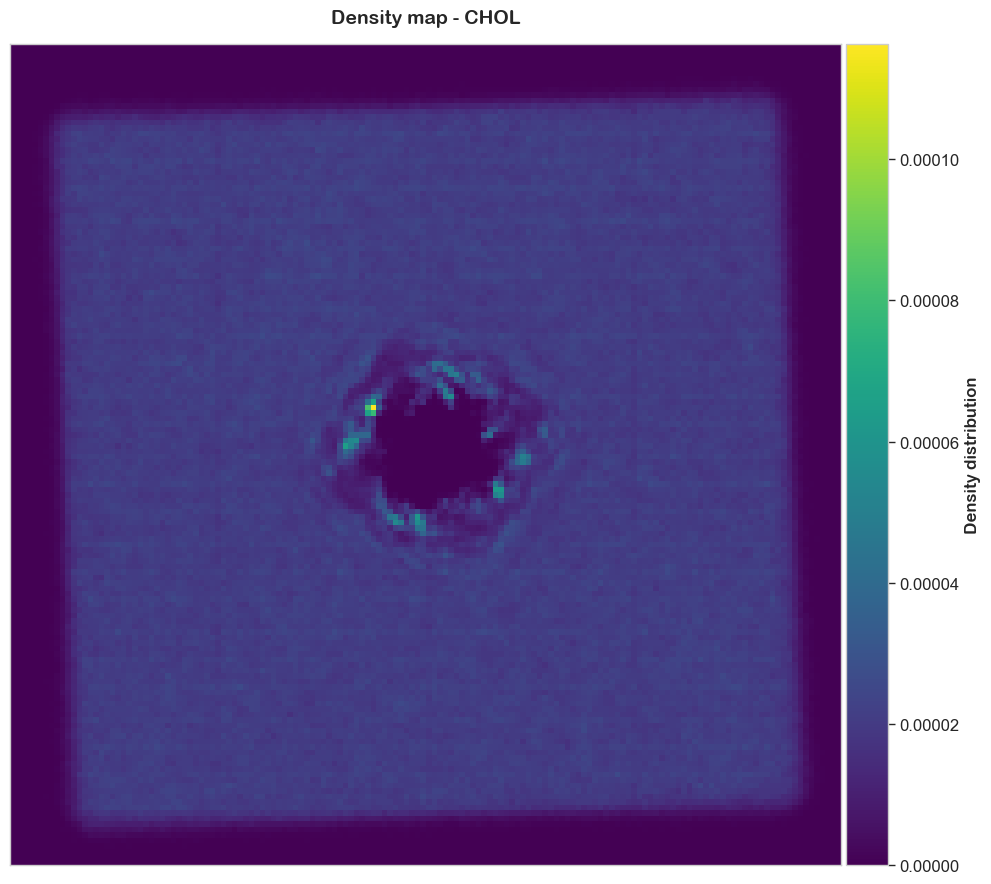

In [10]:
from prolint2.plotting import DensityMap

Dens = DensityMap(u, fig_size=(10, 10))
Dens.create_plot(lipid_type='CHOL', interpolation='nearest', cmap='viridis')

In [11]:
Dens.generate_script(DensityMap, 'lipid_density_plot.py')

#### Lipid contact durations

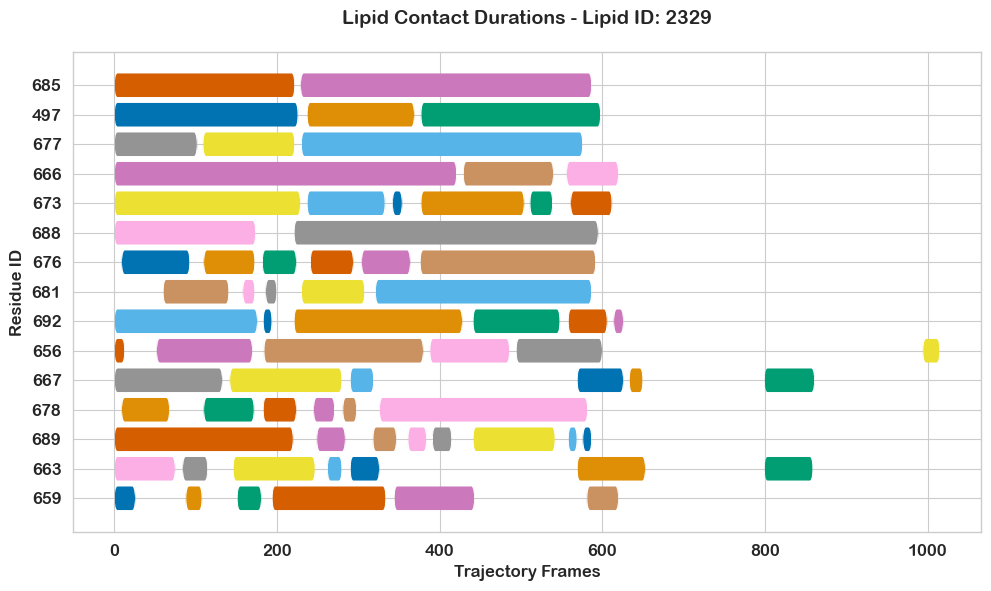

In [12]:
from prolint2.plotting import DurationGantt

DG = DurationGantt(u, contacts)
DG.get_contact_durations('POPE', frequency_filter=10)
# DG.save_plot(lipid_id = 2329, top_filter=15, color='Blue')
DG.create_plot(lipid_id = 2329, top_filter=15)

In [13]:
DG.generate_script(DurationGantt, 'contact_durations_gantt_plot.py')

#### Sequence logo

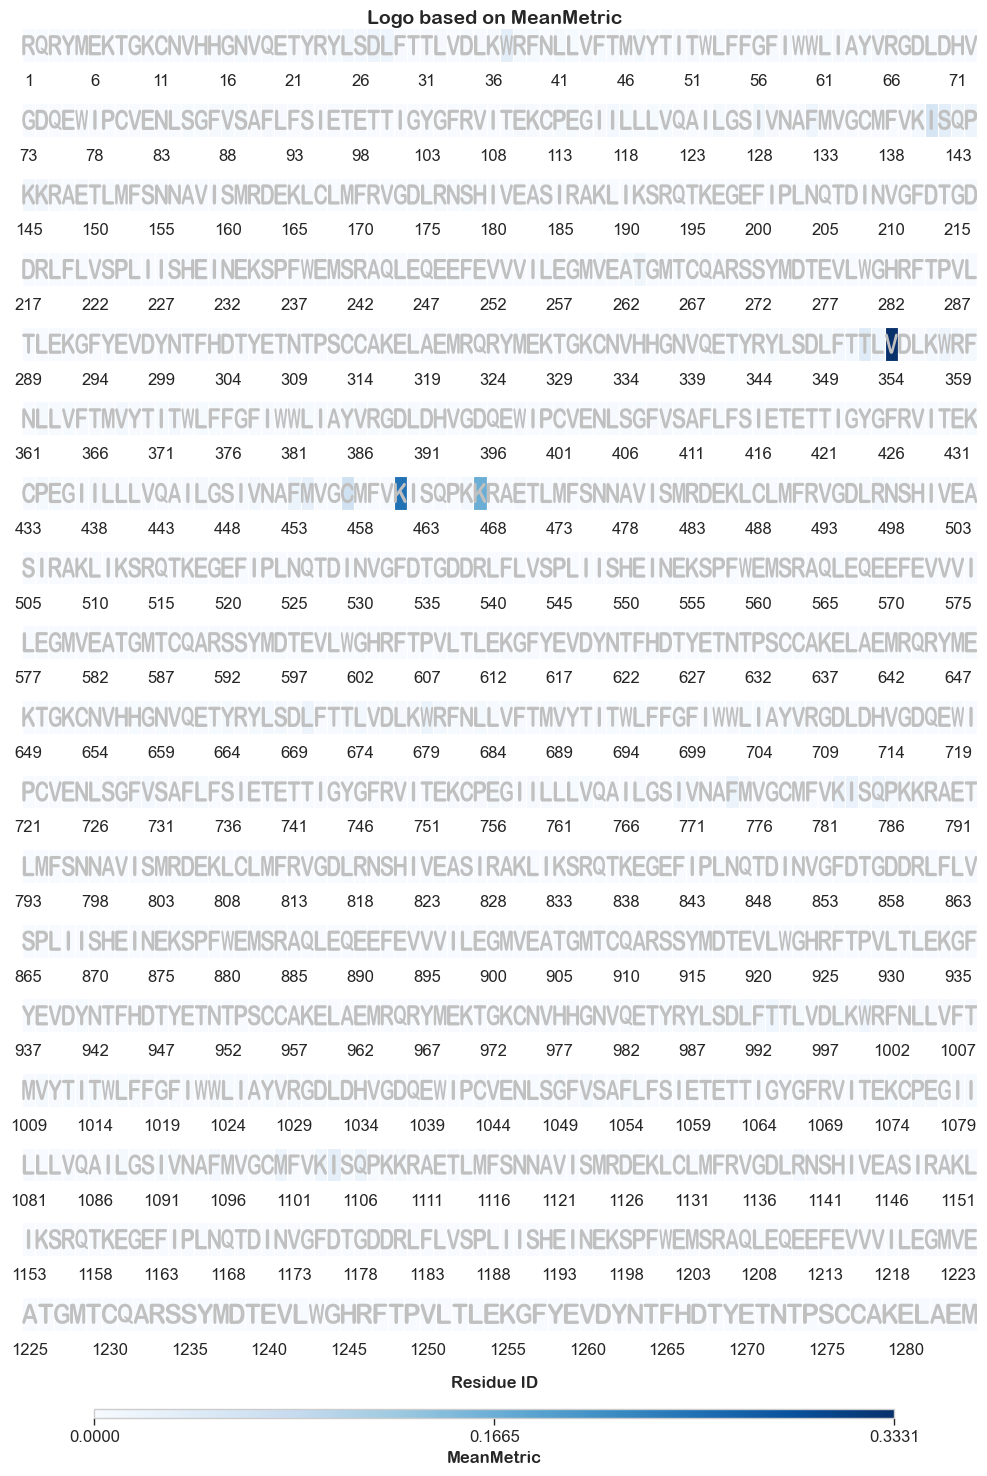

In [14]:
from prolint2.plotting import LogoResidues

LR = LogoResidues(u, mean_contacts)
LR.create_plot(lipid_type='POPS', metric_name='MeanMetric')

In [15]:
LR.generate_script(LogoResidues, 'metric_by_residue_logo_plot.py')

#### Interaction distance plot

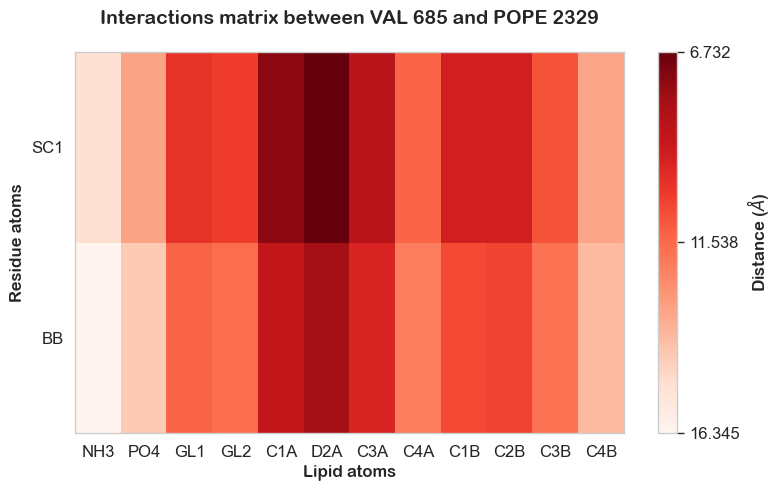

In [16]:
from prolint2.plotting import InteractionHeatMap

IHM = InteractionHeatMap(u, contacts)
IHM.create_plot(residue_id=685, lipid_id=2329, palette='Reds')

In [17]:
IHM.generate_script(InteractionHeatMap, 'contact_distances_heatmap_plot.py')

#### Radial App

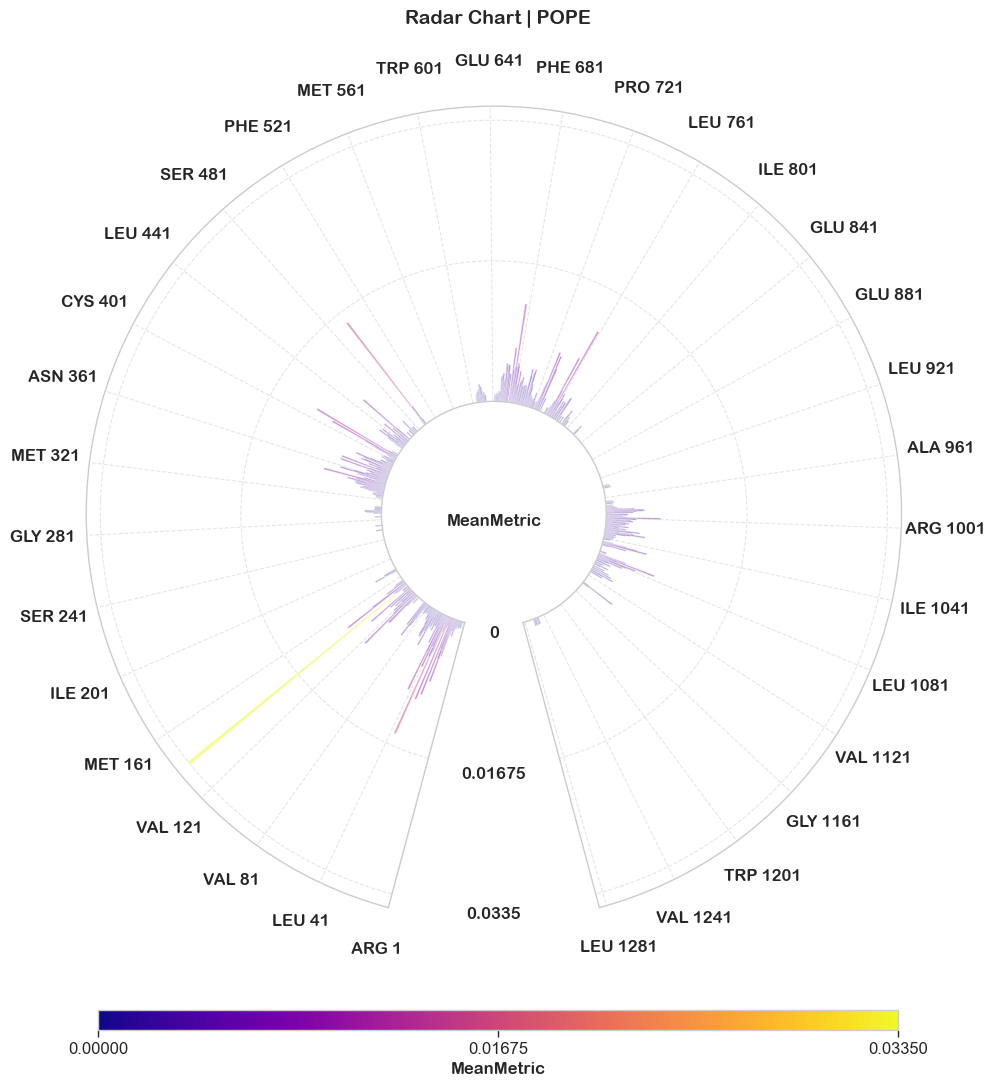

In [18]:
from prolint2.plotting import RadarMetrics

RMP = RadarMetrics(u, mean_contacts)
RMP.create_plot(lipid='POPE', metric_name='MeanMetric', palette='plasma')

In [19]:
RMP.generate_script(RadarMetrics, 'metric_by_residue_radar_plot.py')

#### Shared Contacts

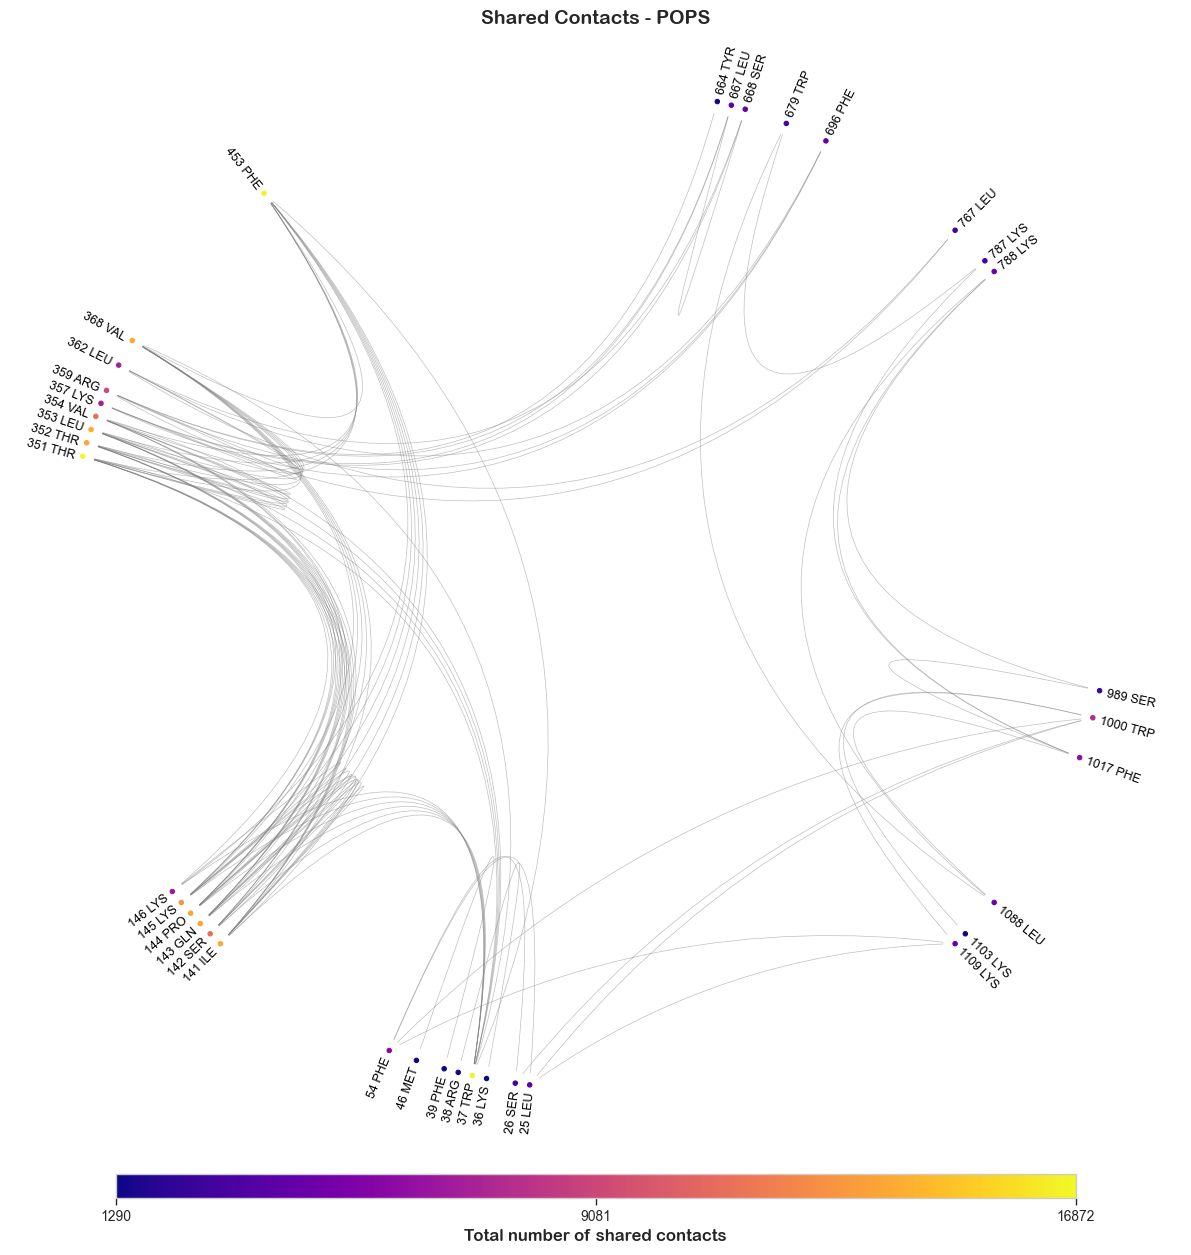

In [20]:
from prolint2.plotting import SharedContacts

SCon = SharedContacts(u, contacts, fig_size=(12, 12))
SCon.create_plot(lipid_type='POPS', label_size=9, palette='plasma')

In [21]:
SCon.generate_script(SharedContacts, 'shared_contacts_plot.py')

#### 3D Projection

In [22]:
# from prolint2.plotting.projection import show_contact_projection
# from prolint2.metrics.metrics import Metric, MeanMetric, SumMetric, MaxMetric 

# mean_instance = MaxMetric()
# metric_instance = Metric(contacts, mean_instance)
# mean_contacts = metric_instance.compute()
    
# view, color_squeme = show_contact_projection(u, mean_contacts, metric_name='MaxMetric', lipid='POPS', query_repr='surface', database_repr='spacefill', cmap='Blues', frame_idx=0)

In [23]:
# def edit_view(view):
#     view.clear_representations(component=1)
#     view.add_representation("spacefill", component=1, selection='CHOL', color='blue')
#     view.clear_representations(component=0)
#     view.add_representation("surface", surfaceType="av", probeRadius=2.1, component=0, color=color_squeme, opacity=0.5)
#     view.add_representation("cartoon", component=0)
#     return view

In [24]:
# edited_view = edit_view(view)

In [25]:
# edited_view